# Homework 4

In [10]:
#load data
from scipy .io import loadmat
import pandas as pd
import numpy as np
from math import exp, expm1

mat = loadmat('hw4data.mat')
df = pd.DataFrame(mat['data'].astype(float))
labels = pd.DataFrame(mat['labels'].astype(float))
labels.columns = ['labels']

### 2.b

In [11]:
def gradient(data, y, w):
    exp = np.exp(np.dot(w,data.T))
    constant = np.ravel((np.transpose([exp/(1+exp)])) - y)
    total = np.array(data) * constant[:,np.newaxis]
    return np.sum(total,0)/df.shape[0]


In [12]:
def log_function(data, y, w):
    dot_product = data.dot(w)
    exp = np.exp(dot_product)
    log = np.log(1+exp)
    second = np.ravel(y*np.transpose([dot_product]))
    total = np.transpose([log - second])
    return np.sum(total,0)/data.shape[0]

In [13]:
def learn_rate(data, labels, w, lambda_t):
    theta = 1
    while log_function(data, labels, w-lambda_t*theta) > log_function(data, labels, w) - .5*theta*np.square(np.linalg.norm(lambda_t)):
        theta = .5*theta
    return theta

In [14]:
def grad_descent(data, labels):
    stop_crit = 0.65064
    w = np.zeros(data.shape[1])
    iterations = 0
    
    while log_function(data, labels, w) >= stop_crit:
        lambda_t = gradient(data, labels, w)
        theta = learn_rate(data, labels, w, lambda_t)
        w = w - theta*lambda_t
        iterations = iterations +1
        print log_function(data, labels, w)
    return iterations, 


In [9]:
# grad_descent(df, labels)

### 2.c

In [15]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

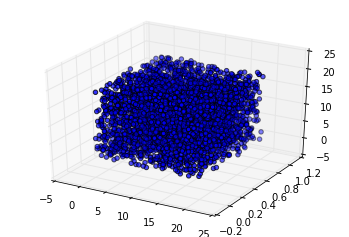

In [16]:
%matplotlib inline
df.columns = ['A','B','C']
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['A'],df['B'],df['C'])

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
# plt.hist(df)
plt.title("Features")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df_std = df / np.std(df)
grad_descent(df_std, labels)

### 2.d

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
def grad_descent_train(data, labels):
    stop_crit = 0.65064
    w = np.zeros(data.shape[1])
    iterations = 0
    train_rows = int(.8*data.shape[0])
    train_data = data[0:train_rows]
    test_data = data[train_rows:]
    train_y = labels[0:train_rows].as_matrix()
    test_y = labels[train_rows:].as_matrix()
    error_rate_new = 1
    error_rates = []
    
    while True: 
        lambda_t = gradient(train_data, train_y, w)
        theta = learn_rate(train_data, train_y, w, lambda_t)
        w = w - theta*lambda_t
        iterations = iterations + 1
        if ((iterations & (iterations - 1)) == 0):
            preds = (np.sign(np.dot(W,test_data.transpose()))+1) / 2
            errors = 0
            for i, j in test_y, preds:
                if i != j:
                    errors += 1
            error_rate = errors / float(test_y.shape[0])
        
        if iterations > 32 and error_rate_new > 0.99 * min(error_rates):
            break
        
        error_rates.append(error_rate_new)                    
            
    return iterations, error_rate_new, w

In [ ]:
grad_descent_train(df, labels)
grad_descent_train(df_std, labels)